# 1. Loading Data

In [40]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt 

# File paths
data_dir = "./data"

# Loading data 
data_file = ["creditcard.csv"]
file_path = os.path.join(data_dir, data_file[0])
df = pd.read_csv(file_path, header=0)


### The Dataset 
It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, we cannot provide the original features and more background information about the data

Scaling: Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this case, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did.

In [41]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Exploration 

In [21]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,...,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0
2,0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,...,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69,0
3,1,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,...,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66,0
4,1,-0.966271711572087,-0.185226008082898,1.79299333957872,-0.863291275036453,-0.0103088796030823,1.24720316752486,0.23760893977178,0.377435874652262,-1.38702406270197,...,-0.108300452035545,0.00527359678253453,-0.190320518742841,-1.17557533186321,0.647376034602038,-0.221928844458407,0.0627228487293033,0.0614576285006353,123.5,0


### Outlier Detection ? 

In [17]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
dtype: int64


#### Class Distribution 
Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (017%) of the time in the dataframe.

Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


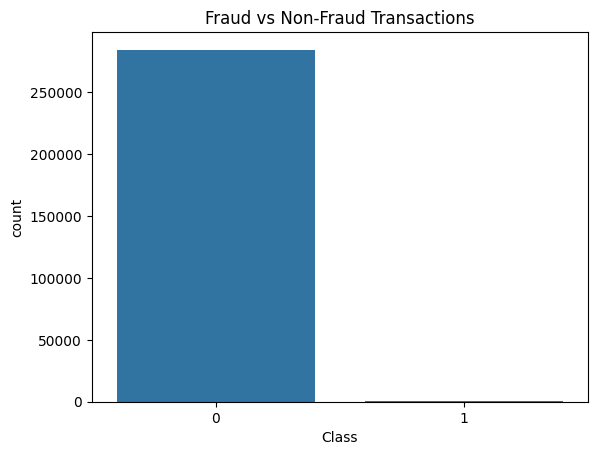

In [30]:
print("Class Distribution:\n", df['Class'].value_counts())

# Visualize class imbalance
sns.countplot(x='Class', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()


### Scaling and Distributing

### Comments:

Maybe use different typr of sampling and compare reuslts? or different models? 

In [42]:
# Save copies of the original columns
original_amount = df['Amount']
original_time = df['Time']

# Scale the columns
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop the original columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)


In [47]:

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


##### Sub-sampling
1. Randomly select 492 non-fraud cases to match the number of fraud cases (492).
2. Combine these with the 492 fraud cases.

In [48]:
# Separate the fraud and non-fraud transactions
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

# Randomly sample 492 non-fraud transactions
non_fraud_sample = non_fraud.sample(n=len(fraud), random_state=42)

# Combine the fraud and non-fraud samples
balanced_df = pd.concat([fraud, non_fraud_sample])

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_df['Class'].value_counts())  # Should show a 50/50 distribution


Class
0    492
1    492
Name: count, dtype: int64


Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


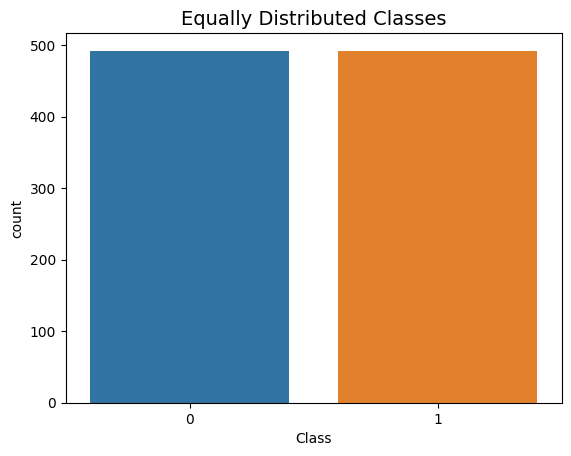

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print the distribution of classes in the balanced dataset
print('Distribution of the Classes in the subsample dataset')
print(balanced_df['Class'].value_counts() / len(balanced_df))

# Define the colors for the plot
colors = ['#1f77b4', '#ff7f0e']  # Blue for non-fraud, orange for fraud

# Plot the distribution
sns.countplot(x='Class', data=balanced_df, palette=colors,  hue='Class',
    legend=False)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()


## Exploratoy Analysis

Could use the heatmap to justify feature selection, if we have time. 

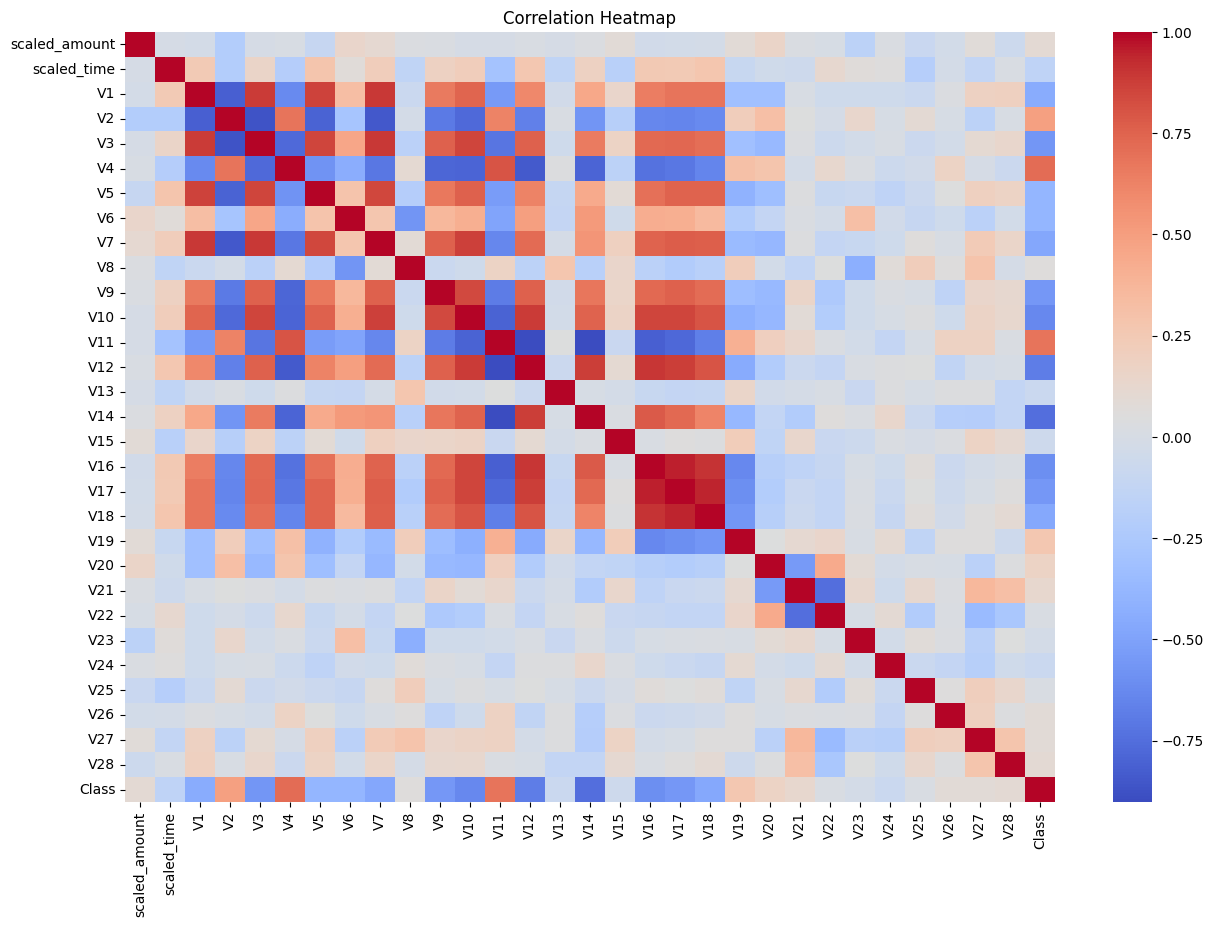

In [55]:


# Compute correlations
correlation_matrix = balanced_df.corr()

# Plot a heatmap of the correlations
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


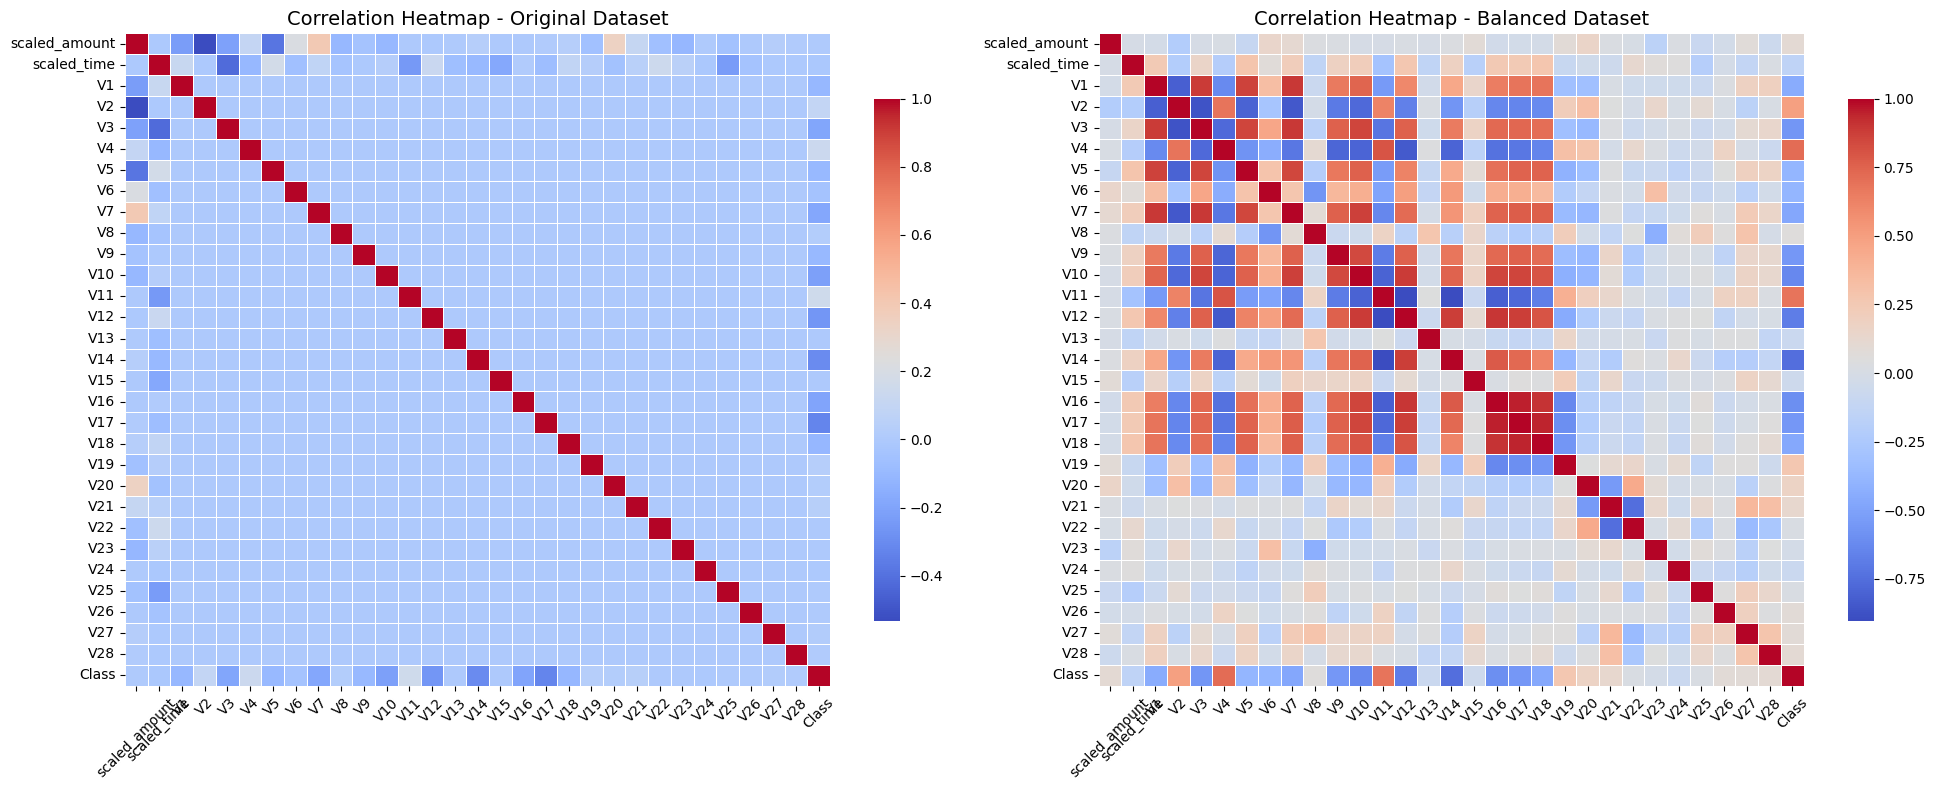

In [57]:


original_corr = df.corr() 
balanced_corr = balanced_df.corr()  


fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap for the original dataset
sns.heatmap(
    original_corr,
    cmap="coolwarm",
    annot=False,
    fmt=".2f",
    linewidths=0.5,
    ax=axes[0],
    cbar_kws={"shrink": 0.8}
)
axes[0].set_title("Correlation Heatmap - Original Dataset", fontsize=14)
axes[0].tick_params(axis='x', labelrotation=45)
axes[0].tick_params(axis='y', labelrotation=0)

# Heatmap for the balanced dataset
sns.heatmap(
    balanced_corr,
    cmap="coolwarm",
    annot=False,
    fmt=".2f",
    linewidths=0.5,
    ax=axes[1],
    cbar_kws={"shrink": 0.8}
)
axes[1].set_title("Correlation Heatmap - Balanced Dataset", fontsize=14)
axes[1].tick_params(axis='x', labelrotation=45)
axes[1].tick_params(axis='y', labelrotation=0)

plt.tight_layout()
plt.show()


### Modeling  